# Value at Risk


The potential loss in the value of a risky portfolio/asset given:
1. A specified time period
2. A confidence level
Methods to calculate VaR: 
a) Parametric Method:The parametric method calculates VaR by assuming returns 
follow a specific probability distribution (typically normal) and using the mean and
standard deviation of historical returns to estimate potential losses at a given 
confidence level.
b) Historical Method: It calculates VaR by using actual hitorical returns of an asset 
or portfolio,ranking these returns from worst to best, and selecting the loss at the desired
percentile as the VaR estimate.
c) Monte Carlo Simulation: It simulates numerours potential future price paths.
Based on asset's statistical properties(mu,sd).
Typically involves thousand of simulations.
Calculates potential losses for each simulation.
VaR is derived from the distribution of simulated losses.

# 1)Parametric Method

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

In [12]:
#set time from to a certain number of years
years = 15
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)

In [13]:
#Create a list of tickers
tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

In [15]:
#Download the daily adjusted close prices for the tickers
adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=startDate, end=endDate)
    adj_close_df[ticker] = data['Close']

log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns = log_returns.dropna()

C:\Users\DIVYAP~1\AppData\Local\Temp/ipykernel_10152/469122282.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=startDate, end=endDate)
[*********************100%***********************]  1 of 1 completed
C:\Users\DIVYAP~1\AppData\Local\Temp/ipykernel_10152/469122282.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=startDate, end=endDate)
[*********************100%***********************]  1 of 1 completed
C:\Users\DIVYAP~1\AppData\Local\Temp/ipykernel_10152/469122282.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=startDate, end=endDate)
[*********************100%***********************]  1 of 1 completed
C:\Users\DIVYAP~1\AppData\Local\Temp/ipykernel_10152/469122282.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker,

In [16]:
print(adj_close_df)

                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2010-07-26   84.928856  53.044559  115.519997   40.657558   43.571026
2010-07-27   84.921219  53.018501  113.510002   40.640045   43.517464
2010-07-28   84.373108  53.109577  113.779999   40.316109   43.211437
2010-07-29   83.961990  53.168129  114.290001   40.018456   42.989559
2010-07-30   83.946793  53.246231  115.489998   40.105995   43.035465
...                ...        ...         ...         ...         ...
2025-07-14  624.809998  72.790001  308.010010  556.210022  307.720001
2025-07-15  622.140015  72.570000  306.730011  556.719971  306.100006
2025-07-16  624.219971  72.709999  308.260010  557.289978  307.260010
2025-07-17  628.039978  72.730003  307.589996  561.799988  309.260010
2025-07-18  627.580017  72.849998  308.390015  561.260010  309.089996

[3769 rows x 5 columns]


#Calculate the daily log returns
""""Log returns are better than simple returns as they are additive and 
if we want to calculate the anualized returns it would be easy to work with""""


In [18]:
log_returns = np.log(adj_close_df/adj_close_df.shift(1))
log_returns = log_returns.dropna()

print(log_returns)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2010-07-27 -0.000090 -0.000491 -0.017553 -0.000431 -0.001230
2010-07-28 -0.006475  0.001716  0.002376 -0.008003 -0.007057
2010-07-29 -0.004885  0.001102  0.004472 -0.007410 -0.005148
2010-07-30 -0.000181  0.001468  0.010445  0.002185  0.001067
2010-08-02  0.022330 -0.000222  0.000433  0.018599  0.021283
...              ...       ...       ...       ...       ...
2025-07-14  0.001906 -0.000137 -0.003662  0.003620  0.002277
2025-07-15 -0.004282 -0.003027 -0.004164  0.000916 -0.005278
2025-07-16  0.003338  0.001927  0.004976  0.001023  0.003782
2025-07-17  0.006101  0.000275 -0.002176  0.008060  0.006488
2025-07-18 -0.000733  0.001649  0.002598 -0.000962 -0.000550

[3768 rows x 5 columns]


In [19]:
#Create an equally weighted portfolio
portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
print(weights)

[0.2 0.2 0.2 0.2 0.2]


In [20]:
#Calculate the historical portfolio returns
historical_returns = (log_returns * weights).sum(axis =1)
print(historical_returns)

Date
2010-07-27   -0.003959
2010-07-28   -0.003489
2010-07-29   -0.002374
2010-07-30    0.002997
2010-08-02    0.012485
                ...   
2025-07-14    0.000801
2025-07-15   -0.003167
2025-07-16    0.003009
2025-07-17    0.003750
2025-07-18    0.000400
Length: 3768, dtype: float64


In [22]:
#Find the X-day historical returns
days = 5

#5 day rolling returns
historical_x_day_returns = historical_returns.rolling(window = days).sum()

In [23]:
#Create a covariance matrix for all the securities
cov_matrix = log_returns.cov()*252

In [24]:
#Calculate portfolio SD
portfolio_std_dev = np.sqrt(weights.T @ cov_matrix @ weights)

In [26]:
#Set different confidence levels to visualize
confidence_levels = [0.90,0.95,0.99]

In [27]:
#Calculate VaR at different condidence levels
VaRs = []

for cl in confidence_levels:
    VaR = portfolio_value * portfolio_std_dev * norm.ppf(cl)*np.sqrt(days/252)
    VaRs.append(VaR)

In [29]:
#Print out the VaR results
print(f'{"Confidence Level" :<20} {"Value at Risk" :<20}')
print('-' * 40)

#Print each confidence level and its corresponding VaR value
for cl, VaR in zip(confidence_levels, VaRs):
    print(f'{cl * 100:>6.0f}%: {"":<8} ${VaR:>10,.2f}')
      

Confidence Level     Value at Risk       
----------------------------------------
    90%:          $ 21,075.53
    95%:          $ 27,050.15
    99%:          $ 38,257.54


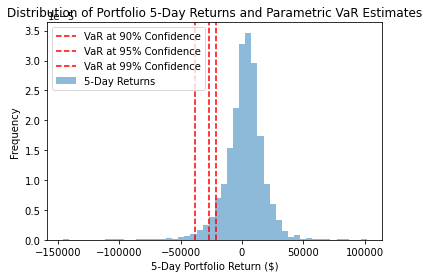

In [30]:
#Plot the Distribution of Portfolio Returns and Parametric VaR Estimates
# Convert returns to dollar values for the histogram
historical_x_day_returns_dollar = historical_x_day_returns * portfolio_value

# Plot the histogram
plt.hist(historical_x_day_returns_dollar, bins=50, density=True, alpha=0.5, label=f'{days}-Day Returns')

# Add vertical lines representing VaR at each confidence level
for cl, VaR in zip(confidence_levels, VaRs):
    plt.axvline(x=-VaR, linestyle='--', color='r', label='VaR at {}% Confidence'.format(int(cl * 100)))

plt.xlabel(f'{days}-Day Portfolio Return ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns and Parametric VaR Estimates')
plt.legend()
plt.show()

# 2) Monte Carlo Method

'''using the log returns and weights calculated above define expected returns''''
*We are assuming that future returns are based on past returns, which is not a reliable assumption.

In [32]:
def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)

### Create a function that will be used to calculate portfolio standard deviation
def standard_deviation (weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

In [33]:
### Create a covariance matrix for all the securities
cov_matrix = log_returns.cov()
print(cov_matrix)

              SPY           BND       GLD       QQQ           VTI
SPY  1.182798e-04  7.819971e-07  0.000005  0.000132  1.204661e-04
BND  7.819971e-07  9.604571e-06  0.000009  0.000002  9.888446e-07
GLD  4.910234e-06  9.127213e-06  0.000097  0.000006  5.410013e-06
QQQ  1.324177e-04  1.567122e-06  0.000006  0.000171  1.348642e-04
VTI  1.204661e-04  9.888446e-07  0.000005  0.000135  1.236569e-04


In [34]:
### Create an equally weighted portfolio and find total portfolio expected return and standard deviation
portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
portfolio_expected_return = expected_return(weights, log_returns)
portfolio_std_dev = standard_deviation (weights, cov_matrix)

In [35]:
##Defining Functions for Monte Carlo Simulation
def random_z_score():
    return np.random.normal(0, 1)

### Create a function to calculate scenarioGainLoss
days = 20

def scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days):
    return portfolio_value * portfolio_expected_return * days + portfolio_value * portfolio_std_dev * z_score * np.sqrt(days)

In [36]:
### Run 10000 simulations
simulations = 10000
scenarioReturn = []

for i in range(simulations):
    z_score = random_z_score()
    scenarioReturn.append(scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days))

In [37]:
### Specify a confidence interval and calculate the Value at Risk (VaR)
confidence_interval = 0.99
VaR = -np.percentile(scenarioReturn, 100 * (1 - confidence_interval))
print(VaR)

67183.60808399868


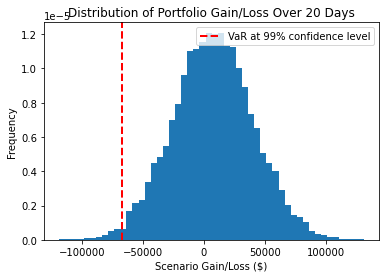

In [38]:
### Plot the results of all 10000 scenarios
plt.hist(scenarioReturn, bins=50, density=True)
plt.xlabel('Scenario Gain/Loss ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio Gain/Loss Over {days} Days')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()

# 3) Historical Level

In [39]:
historical_returns = (log_returns * weights).sum(axis =1)
print(historical_returns)

Date
2010-07-27   -0.003959
2010-07-28   -0.003489
2010-07-29   -0.002374
2010-07-30    0.002997
2010-08-02    0.012485
                ...   
2025-07-14    0.000801
2025-07-15   -0.003167
2025-07-16    0.003009
2025-07-17    0.003750
2025-07-18    0.000400
Length: 3768, dtype: float64


In [40]:
days = 50

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
2010-10-05    0.061379
2010-10-06    0.065087
2010-10-07    0.066934
2010-10-08    0.074874
2010-10-11    0.073330
                ...   
2025-07-14    0.083498
2025-07-15    0.079836
2025-07-16    0.074496
2025-07-17    0.076112
2025-07-18    0.075722
Length: 3719, dtype: float64


In [41]:
confidence_interval = 0.99

VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100))*portfolio_value
print(VaR)

109875.93315453162


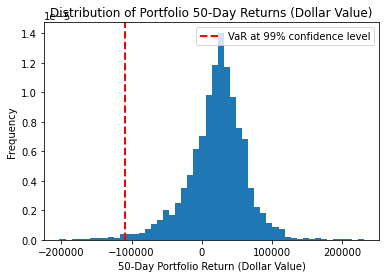

In [42]:
return_window = days
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()